# VERIFICA LEGGE DI OHM

OBIETTIVO: verificare V=RI

PROCEDIMENTO: resistenza fissata, variata tensione e misurata corrente

In [1]:
import pandas as pd # nicolo
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
FILE = dir_path + '/data/' + 'VRI.csv'

from interpolazione import RettaInterpolata

In [2]:
fr = pd.read_csv(FILE)

R = 2 * 10**6 # usata resistenza 2MΩ, non applico -0.2 ohm
sigmaRpercent = 0.03
sigmaR = R*sigmaRpercent

V = np.array(fr['V'])
sigmaVpercent = 0.01
sigmaV = V * sigmaVpercent

I = np.array(fr['I(uA)']) * 10**-6 # micro ampere
sigmaIpercent = 0.01
sigmaI = I * sigmaIpercent

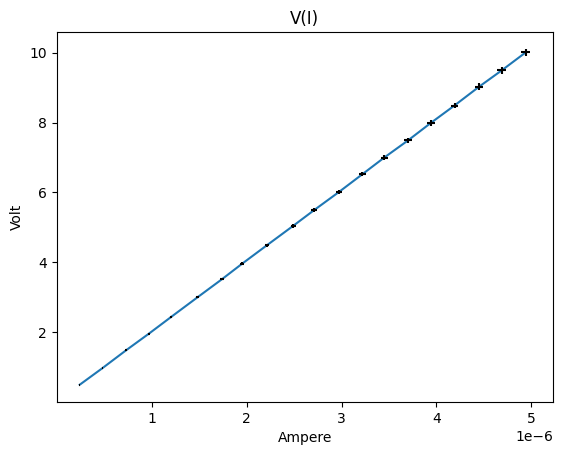


linearità A + BX
    
A: -0.0015949412307977447 
B: 2026954.5664458114
sigmaA: 0.003226842257473602
sigmaB: 1091.768527614701

sigmaY: 0.01    
chiquadro ridotto: 0.39
df: 18
pvalue: 100.0%


In [3]:
r = RettaInterpolata(I,V,0.01)
plt.title('V(I)')
plt.plot(r.X,r.Y)
plt.errorbar(I,V,yerr=sigmaV,xerr=sigmaI,fmt=' ',color='red',ecolor='black')
plt.ylabel('Volt')
plt.xlabel('Ampere')
plt.show()
print(r)

In [4]:
R_i = r.B
sigmaR_i = r.sigmaB

t = np.abs(R-R_i)/np.sqrt(sigmaR**2 + sigmaR_i**2)

print('T-test: ',t)
print('t-value: ',2*sc.norm.cdf(-t,0,1)) # area esterna a t

T-test:  0.44916842051140304
t-value:  0.6533101663657905
